# Comparing Different Classification Models on MNIST Dataset
## Table of Contents
<ul>
<li> <a href="#intro"> Introduction </a></li>
<li> <a href="#Lib"> Libraries </a></li>
<li> <a href="#getting"> Getting Familiarize With Data </a></li>
<li> <a href="#Spliting"> Spliting Data to Train and Test </a></li>
<li> <a href="#Rescaling"> Rescaling Data </a></li>
<li> <a href="#Evaluation"> Evaluation of Different Models Using Cross-Validation </a></li>
<li> <a href="#Error"> Error Analysis </a></li>
<li> <a href="#other"> Performance Over the Test Data </a></li>
<li> <a href="#conclu"> Conclusion </a></li>

### Reference:
Géron, Aurélien, Hands-On Machine Learning with Scikit-Learn and TensorFlow

<a id="intro"></a>
## Introduction


In this project, we will compare the performance of the 4 different classification models on  the MNIST dataset.  MNIST is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. 

<a id="map"></a>
## Libraries

In [42]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score 
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline

<a id="getting"></a>
## Getting Familiarize With Data

MNIST is a dictionary in which 'data' key contains an numpy array with one row per instance and one column per feature(one of the 784 pixels in a 28*28 image of a number from 0 to 9). A 'target' key containing an array with the labels(numbers from 0 to 9)



In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [41]:
X , y = mnist['data'], mnist['target']
print X.shape, y.shape

(70000, 784) (70000,)


Here we can see graphic representation of some data in the MNIST dataset:

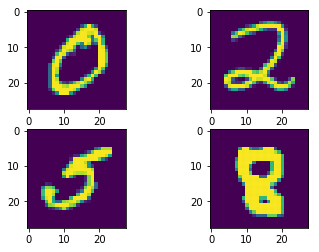

In [6]:
plt.subplot(221);
plt.imshow(X[0].reshape(28,28))
plt.subplot(222);
plt.imshow(X[18000].reshape(28,28))
plt.subplot(223);
plt.imshow(X[36000].reshape(28,28))
plt.subplot(224);
plt.imshow(X[54000].reshape(28,28))
plt.show()

For each number there is between 6500 to 8000 samples in the DataSet. So, the frequencies are not skewed and they are evenly distributed

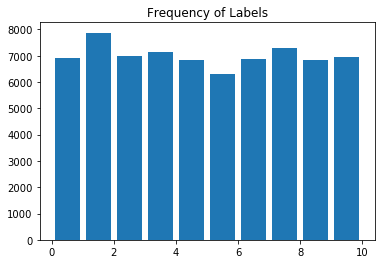

In [10]:
plt.title("Frequency of Labels")
plt.hist(y, bins = range(11), rwidth = 0.8)
plt.show()

<a id="data audit"></a>
## Spliting Data to Train and Test

Befor testing any model, we split the dataset to train and test data; with 60000 datapoints for training and 10000 for testing. we also shuffle the training data in oreder to make all cross_validation folds similar

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
index = np.random.permutation(60000)
X_train, y_train = X_train[index], y_train[index]

<a id="clean"></a>
## Rescaling Data

Many of the Classification Models have a better performance with scaled data. So here we use Standard Scaler to scale data for future performance tests. 

In [8]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform( X_train.astype( np.float64))

<a id="building"></a>
## Evaluation of Different Models Using Cross-Validation

In this section we test the performance of three different classifiers: SGD, SVC and Random Forest. First we fit the model with train data and predict the label of some datapoints in the training dataset. Then we check how the model performs on the training data. Finally, in order to prevent overfitting, we use Cross_Validation to evalute each model.

### SGD Classifier

In [29]:
# SGD Classifier
sgd_clf = SGDClassifier( random_state = 42) 
sgd_clf.fit(X_train, y_train)
print sgd_clf.predict([X[0],X[18000],X[36000],X[54000]])
print sgd_clf.classes_ 

[ 0.  2.  5.  8.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [21]:
# Model's Accuracy on Training Data
y_train_pred = sgd_clf.predict(X_train)
print accuracy_score(y_train.reshape(-1,1), y_train_pred.reshape(-1,1))

0.881783333333


In [16]:
#SGDC Cross_Validation & Accuracy_Score
accuracy_score = cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring ='accuracy')
print "accuracy is :", accuracy_score
print "Mean Accuracy is:", round(np.mean(accuracy_score),2)

accuracy is : [ 0.86357728  0.85464273  0.8540281 ]
Mean Accuracy is: 0.86


In [28]:
#SGDC Cross_Validation & Accuracy_Score with scaled inputs
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform( X_train.astype( np.float64))
accuracy_score = cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring ='accuracy')
print "Scaled_Data accuracy is :", accuracy_score
print "Mean Scaled_Data Accuracy is:", round(np.mean(accuracy_score),2)

Scaled_Data accuracy is : [ 0.91136773  0.90829541  0.90893634]
Mean Scaled_Data Accuracy is: 0.91


Scaling the inputs increases accuracy of SGD classifier above 90%. 

### SVM Classifier

In [17]:
# SVM Classifier
svc_clf = LinearSVC()
svc_clf.fit(X_train, y_train)
print svc_clf.predict([X[0],X[18000],X[36000],X[54000]])

[ 0.  2.  5.  8.]


In [23]:
# Model's Accuracy on Training Data
y_train_pred = svc_clf.predict(X_train)
print accuracy_score(y_train.reshape(-1,1), y_train_pred.reshape(-1,1))

0.881233333333


In [40]:
#SVC Cross_Validation & Accuracy_Score
accuracy_score = cross_val_score(svc_clf, X_train, y_train, cv = 3, scoring ='accuracy')
print "accuracy is :", accuracy_score
print "Mean Accuracy is:", round(np.mean(accuracy_score),2)

accuracy is : [ 0.86992601  0.85904295  0.87138071]
Mean Accuracy is: 0.87


### Random Forest Classifier

In [30]:
# Random Forest Classifier
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train, y_train)
print forest_clf.predict([X[0],X[18000],X[36000],X[54000]])
print forest_clf.classes_ 

[ 0.  2.  5.  8.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [26]:
# Model's Accuracy on Training Data
y_train_pred = forest_clf.predict(X_train)
print accuracy_score(y_train.reshape(-1,1), y_train_pred.reshape(-1,1))

0.9992


In [27]:
#Random Forest Cross_Validation & Accuracy_Score
accuracy_score = cross_val_score(forest_clf, X_train, y_train, cv = 3, scoring ='accuracy')
print "accuracy is :", accuracy_score
print "Mean Accuracy is:", round(np.mean(accuracy_score),2)

accuracy is : [ 0.94136173  0.94309715  0.93834075]
Mean Accuracy is: 0.94


SVC is much slower and has worse performance than both SGD and Random Forest;

## Error Analysis

We chose SGD and Random Forest over SVM based on thier higher accuracy score. Now, lets see how is their performance regarding Precision and Recall Scores. 

### SGD Classifier

In [33]:
#SGDC Error Analysis
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)

#Confusion Matrix
print confusion_matrix( y_train, y_train_pred)

[[5715    0   31   30    4   35   45    5   37   21]
 [   2 6442   35  104    7   20   13    7   90   22]
 [ 115  144 5051  205   37   32  109   41  175   49]
 [  80   59  144 5254    8  233   29   39  192   93]
 [  39   33   92  112 4844   12   84   19   86  521]
 [ 100   26   91  359   80 4063   99   23  462  118]
 [  69   21  124   12   27   86 5519    3   51    6]
 [  62   29  119  184   50   10    7 5314   52  438]
 [  77  243  213  373   41  229   53   27 4259  336]
 [  83   28   59  219  250   36    1  192   97 4984]]


In [35]:
#Precision and Recall Scores
print "precision is:", round(precision_score( y_train, y_train_pred, average='micro'),2)
print "recall is:", round(recall_score(y_train, y_train_pred, average='micro'),2)

precision is: 0.86
recall is: 0.86


### Random Forest Classifier

In [36]:
#Random Foresrt Error Analysis
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv = 3)

#Confusion Matrix
print confusion_matrix( y_train, y_train_pred)

[[5820    3   13   12    5   11   29    1   24    5]
 [   3 6617   38   25   11   10    3   11   14   10]
 [  54   26 5636   61   31   12   28   52   49    9]
 [  26   19  148 5625   15  121    8   59   79   31]
 [  14   15   32    6 5559    8   39   20   29  120]
 [  51   15   27  194   35 4941   57    6   68   27]
 [  61   21   28    8   35   57 5669    2   35    2]
 [  14   29   88   31   67    4    0 5931   20   81]
 [  30   60   96  123   64   96   47   16 5254   65]
 [  29   18   37   80  175   43    7   93   63 5404]]


In [37]:
#Precision and Recall Scores
print "precision is:", round(precision_score( y_train, y_train_pred, average='micro'),2)
print "recall is:", round(recall_score(y_train, y_train_pred, average='micro'),2)

precision is: 0.94
recall is: 0.94


<a id="overview"></a>
## Performance Over the Test Data

In [38]:
y_test_pred = sgd_clf.predict(X_test)
print accuracy_score(y_test.reshape(-1,1), y_test_pred.reshape(-1,1))

0.8771


In [39]:
y_test_pred = forest_clf.predict(X_test)
print accuracy_score(y_test.reshape(-1,1), y_test_pred.reshape(-1,1))

0.9448


These results are completely consistent with the Cross_Validation results.

<a id="conclu"></a>
## Conclusion

According to our evaluation, Random Forest Classifier has the best results on MNIST dataset 